## Crime forecasting with NeuralProphet using default parameters.

1. Importing libraries

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet
import random   
import numpy as np
from neuralprophet import utils
random.seed(42)
np.random.seed(42)
utils.set_random_seed(seed=42)

2. Importing daily crime count without weather data.

<Axes: xlabel='ds'>

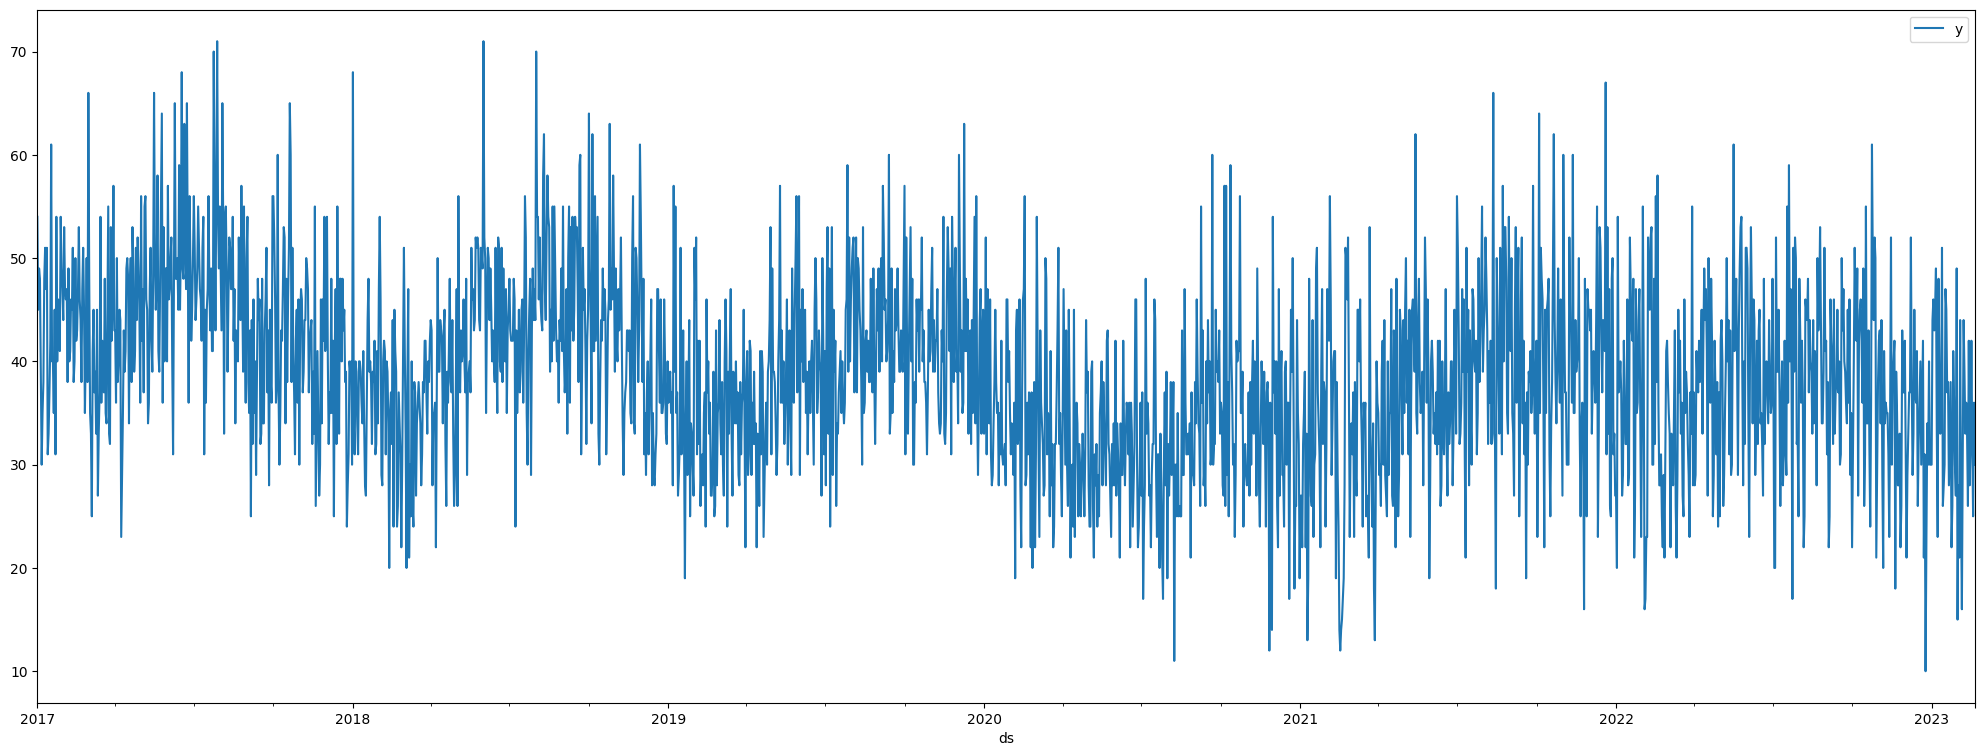

In [2]:
df2 = pd.read_csv("../../../data/daily-count-w-weather.csv")
df2 = df2[["ds", "y"]]
df2["ds"] = pd.to_datetime(df2["ds"])
df2.set_index('ds').plot(figsize=(25, 9))

In [3]:
train = df2[:int(0.8 * (len(df2)))]
test = df2[int(0.8 * (len(df2))):]
train.tail(), test.head()

(             ds   y
 1788 2021-11-24  33
 1789 2021-11-25  16
 1790 2021-11-26  48
 1791 2021-11-27  35
 1792 2021-11-28  25,
              ds   y
 1793 2021-11-29  47
 1794 2021-11-30  45
 1795 2021-12-01  45
 1796 2021-12-02  43
 1797 2021-12-03  45)

3. Fitting the NeuralProphet.

In [4]:
m = NeuralProphet()

m = m.add_country_holidays(country_name='US')

m.fit(train)
future = m.make_future_dataframe(train, periods=test.shape[0])
forecast = m.predict(future)
forecast_on_train = m.predict(train)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 163
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (57) is too small than the required number for the learning rate finder (231). The results might not be optimal.


Finding best initial lr:   0%|          | 0/231 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.777% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.777% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 57it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.944% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 57it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [5]:
forecast_on_train.head()

,ds,y,yhat1,trend,season_yearly,season_weekly,events_additive,event_Christmas Day,event_Christmas Day (Observed),event_Columbus Day,...,event_Juneteenth National Independence Day (Observed),event_Labor Day,event_Martin Luther King Jr. Day,event_Memorial Day,event_New Year's Day,event_New Year's Day (Observed),event_Thanksgiving,event_Veterans Day,event_Veterans Day (Observed),event_Washington's Birthday
0,2017-01-01,54,41.501991,45.853306,-1.054184,-5.319593,2.022462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.022462,0.000000,0.0,0.0,0.0,0.0
1,2017-01-02,45,45.332237,45.863422,-1.076722,3.463197,-2.917662,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,-2.917662,0.0,0.0,0.0,0.0
2,2017-01-03,49,44.933090,45.873547,-1.097244,0.156786,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
3,2017-01-04,48,45.394440,45.883663,-1.116008,0.626783,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
4,2017-01-05,39,45.723793,45.893784,-1.133300,0.963306,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


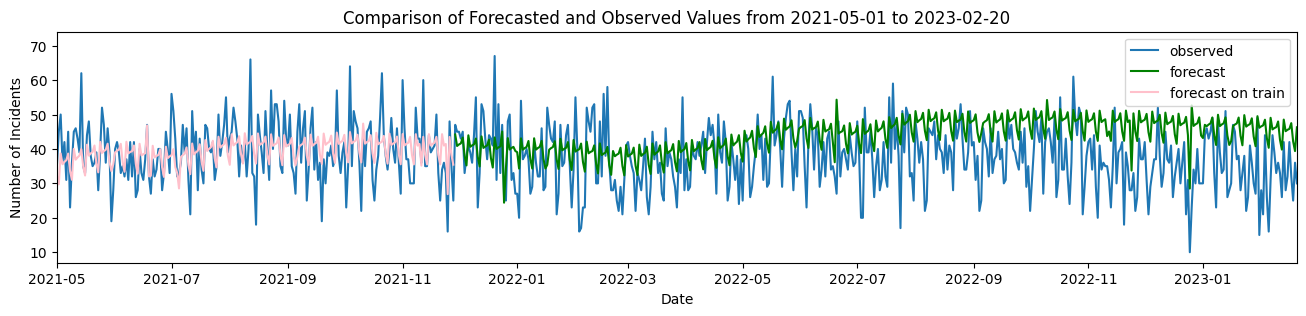

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 5))
plt.plot(df2.ds, df2.y, label='observed')

plt.plot(forecast['ds'], forecast['yhat1'],
         label='forecast', color='green')
plt.plot(forecast_on_train['ds'], forecast_on_train['yhat1'],
         label='forecast on train', color='pink')
plt.title('Comparison of Forecasted and Observed Values from 2021-05-01 to ' + str(test.ds.iloc[-1])[:10])
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.legend()
#calculate last date in test data
plt.xlim(pd.Timestamp('2021-05-01'), pd.Timestamp(test.ds.iloc[-1]))
plt.gcf().set_size_inches(16, 3)
plt.savefig('../neural-prophet-forecast.png')
plt.show()

In [7]:
test = test.merge(forecast[['ds', 'yhat1']], how='left', on='ds')

4. Outputting final metrics for the model.

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('R2: ', r2_score(y_pred=forecast.yhat1, y_true=df2.y[-len(forecast.yhat1):]))
rmse = mean_squared_error(y_pred=forecast.yhat1, y_true=df2.y[-len(forecast.yhat1):], squared=False)
print('RMSE: ', rmse)

R2:  -0.4646158176678288
RMSE:  10.991790938908297
